## Week 6: Assignment

## K-means Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**(1a) Load the data file 'kmc-data1.csv' and visualize the data.**

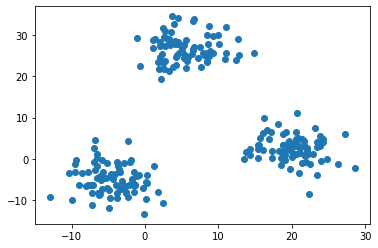

In [ ]:
kmcdata1=pd.read_csv('kmc-data1.csv',header=None)
plt.scatter(kmcdata1[0],kmcdata1[1])

**(1b) Consider the case where K=1. Take centre as $[6.67,8.33]$ and calculate Within Cluster Sum of Squares (WCSS)**

![Clustering_kmeans_c.png](attachment:Clustering_kmeans_c.png)

In [ ]:
dist=0
data=kmcdata1.to_numpy()
for i in range(len(kmcdata1)):
  dist=dist+((data[i][0]-6.67)**2+(data[i][1]-8.33)**2)
print('Within Cluster Sum of Squares for k=1 and centroid [6.67,8.33] is',dist)

Within Cluster Sum of Squares for k=1 and centroid [6.67,8.33] is 73409.43272669794


**(1c) Write a function to find which class each point belongs to given the centroids and value of K**

Hint: data has dimensions (m x n), centroids has dimensions (K x n)

In [ ]:
import numpy as np
def get_class(data,centroids,K):
    size = data.shape[0]
    data_class = np.zeros([size])
    dist=[]
    for i in range(size):
      for j in range(K):
        dist.append((j+1,((data[i]-centroids[j])**2).sum()))
      dist.sort(key=lambda x:x[1])
      data_class[i]=dist[0][0]
      dist=[]
    return(data_class)

**(1d) Write a function to find the centroids given the data points and the corresponding class**

In [ ]:
def get_centroids(data,data_class,K):
    dim = data.shape[1]
    centroids=[]
    for i in range(1,K+1):
      sum=[[0,0]]
      for j in np.where(data_class==i)[0]:
        sum=sum+data[j]
      centroids.append(sum*(1/len(np.where(data_class==i)[0])))
    return(centroids)

**(1e) Write a function to calculate WCSS given the data points, the centroids and K** 

In [ ]:
def wcss(data,centroids,K):
    wcss_clusterwise = [] 
    data_class=get_class(data,centroids,K)
    for i in range(1,K+1):
      sum=0
      for j in np.where(data_class==i)[0]:
        sum=sum+(((centroids[i-1][0]-data[j])**2).sum())
      wcss_clusterwise.append(sum)
    wcss = np.sum(wcss_clusterwise) 
    return(wcss)

**K Means Algorithm:<br>**
    1) Allocate a class to each data point given the initial centroids<br>
    2) Calculate the new centroids,i.e, the mean of the data points in each class<br>
    3) Iterate till the stopping criteria. In our case the algorithm stops when the shift in each centroid is less than tolerance<br>
    

**(1f) Let $K = 3$ and the initial cluster centroids be $[10,30], [25,-5]$ and $[-5,10]$ and write a function to implement K-means clustering using functions defined above. Plot the final clusters with K-means clustering.<br> Take tolerance as $0.001$**

In [ ]:
def kmeans(data,K,centroids):
    data_class=get_class(data,centroids,K)
    old_centroids=centroids
    new_centroids=get_centroids(data,data_class,K)
    while True:
      if abs((new_centroids[0]-old_centroids).sum())>0.003:
        data_class=get_class(data,new_centroids,K)
        old_centroids=new_centroids[0]
        new_centroids=get_centroids(data,data_class,K)
      else:
        break
    return(new_centroids)

In [ ]:
centroid=kmeans(data,3,[[10,30],[25,-5],[-5,10]])
centroid

[array([[ 5.57364328, 26.74003828]]),
 array([[20.17029606,  2.62716538]]),
 array([[-4.44269723, -4.99310089]])]

**(1g) Compute the sum of square distance of each point from the cluster centroid.**

In [ ]:
wcss(data,centroid,3)

4936.722230493093

### Plot

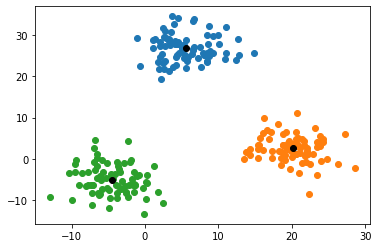

In [ ]:
data_class=get_class(data,centroid,3)
for i in range(1,4):
  sum=[]
  for j in np.where(data_class==i)[0]:
    sum.append(data[j])
  plt.scatter(np.array(sum)[:,0],np.array(sum)[:,1])
  plt.plot(centroid[i-1][0][0],centroid[i-1][0][1],'ko')    

**(1h) Repeat the above exercise for $K = 1,2,3,4$. You can use appropriate initial centroids based on the visualization**

**Plot the final clusters (for $K = 1,2,3,4$) and report the sum of square distance of each point from the cluster mean. Give your observations.**

In [ ]:
k_1=wcss(data,kmeans(data,1,[[10,10]])[0],1)
k_2=wcss(data,kmeans(data,2,[[0,10],[20,10]]),2)
k_3=wcss(data,kmeans(data,3,[[-10,-10],[20,0],[10,30]]),3)
k_4=wcss(data,kmeans(data,4,[[-10,-10],[20,0],[25,20],[-5,20]]),4)

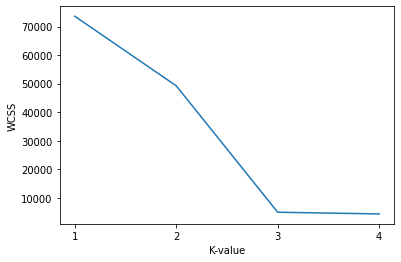

In [ ]:
plt.plot([1,2,3,4],[k_1,k_2,k_3,k_4])
plt.xticks([1,2,3,4]);
plt.xlabel('K-value');
plt.ylabel('WCSS');

## Observations:

### 1) The WCSS score decreases with k value. It reaches an almost constant value after 3. Hence, appropriate value of k is 3. 

**(2a) Load the data from the file 'kmc-data2.csv' and visualize the data on a scatter plot.**

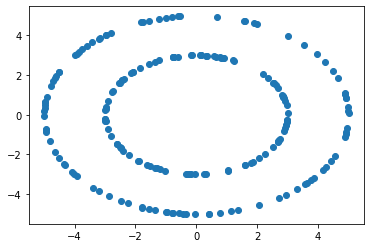

In [43]:
kmcdata2=pd.read_csv('kmc-data2.csv',header=None)
plt.scatter(kmcdata2[0],kmcdata2[1]);

**(2b) Cluster the data with K-means clustering. Consider $K = 2$. (You can use scikit-learn library for to perform clustering)**

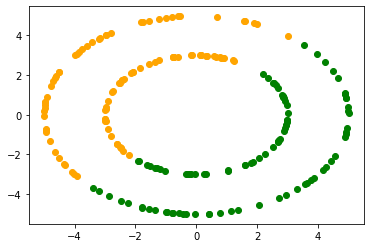

In [44]:
from sklearn.cluster import KMeans
X=kmcdata2.to_numpy()
kmeans = KMeans(n_clusters=2).fit(X)
kmeans.cluster_centers_
plt.scatter(X[kmeans.labels_== 0, 0], X[kmeans.labels_ == 0, 1],
            c='green');
plt.scatter(X[kmeans.labels_== 1, 0], X[kmeans.labels_== 1, 1],
            c='orange');

**(2c) Suppose you want to identify two ring clusters as visualised in the scatter plot. Now, transform the data such that K-means clustering identifies the two ring clusters.**


### Here as the points are in a circle it is better to convert the cartesian coordinates into Polar coordinates. So that points in a circle have same radius 'r' and can be clustered into a same group.

### X_new is the new data which is the transformed data from cartesian to polar.

In [67]:
X_new=[]
for i in range(len(X)):
  r = np.sqrt(X[i][0]**2+X[i][1]**2)
  t = np.arctan2(X[i][1],X[i][0])
  X_new.append((t,r))

###Plot of the new data. From this we can see that the data is clearly separated in accordance to their radius.


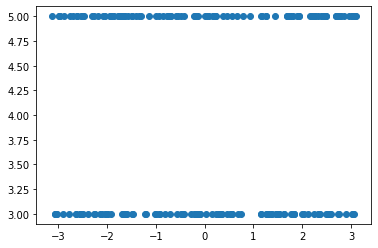

In [81]:
X_new=np.array(X_new)
plt.scatter(X_new[:,0],X_new[:,1])

## Using K-Means to cluster the data into two concentric circles.

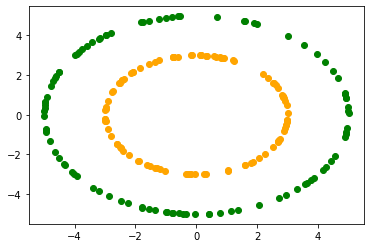

In [80]:
startpts=np.array([[0, 5],[0,3]])
kmeans = KMeans(n_clusters=2,init=startpts,n_init=1).fit(X_new)
plt.scatter(X[kmeans.labels_== 0, 0], X[kmeans.labels_ == 0, 1],
            c='green');
plt.scatter(X[kmeans.labels_== 1, 0], X[kmeans.labels_== 1, 1],
            c='orange');

**(3) Perform K-means clustering on Bank note dataset (attached) which is a classification dataset. Split the data into test and train (80:20 ratio with random seed=0). Perform clustering on the training data and predict labels for test data based on the clusters obtained. Compare the predictions with actual labels and report accuracy. (You can use scikit-learn library for K-means and train-test split and accuracy)**

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
data=pd.read_csv('data_banknote_authentication.csv',header=None)
X=data[[0,1,2,3]].to_numpy()
y=data[4].to_numpy()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [6]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_train)
y_pred=[]
for i in range(len(X_test)):
  y_pred.append(kmeans.predict(X_test[i].reshape(-1,4)))
accuracy_score(y_test,y_pred)

0.6690909090909091

## Logistic Regression

Logistic Regression uses the sigmoid function for binary classification. 

**(4a) Plot the sigmoid function $\frac{1}{1+e^{-x}}$ for x in the range [-20,20] at 100 equally spaced values. This exercise will help you understand the shape of the sigmoid function and show its relevance in binary classification problems**

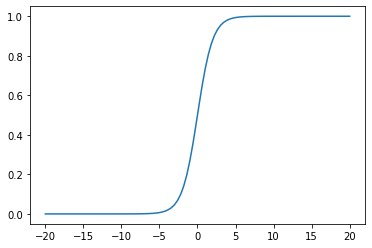

In [ ]:
x=np.linspace(-20,20,100)
y=1/(1+np.exp(-x))
plt.plot(x,y)

**(4b) Comment on the nature of the sigmoid function graph (specifically : domain,range,behaviour in extreme inputs).**

**Domain:** The domain of the sigmoid function is -inf to +inf

**Range:** The range of the sigmoid function is [0,1]

And at extreme points the value of the function approaches 1 and 0 for +inf and -inf respectively.


**(4c) Using the derivative formula of sigmoid function, plot the gradients of the sigmoid function for the 100 values in the range [-20,20].**

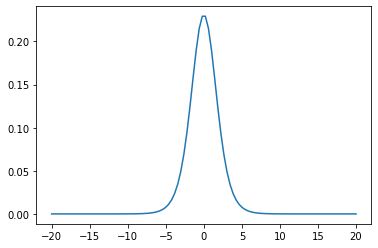

In [14]:
from scipy.misc import derivative
import numpy as np
f=lambda x: 1/(1+np.exp(-x))
x=np.linspace(-20,20,100)
y=derivative(f,x)
plt.plot(x,y);

**Consider the given data X_logistic.txt and y_logistic.txt. Perform random shuffle and then split the data as train-validation-test sets in the ratio of 80:10:10. Note that the y value gives the class label (0 or 1).** 

**(5a) Implement logistic regression (using only numpy) to predict whether the test datapoints belong to class 0 or 1. Gradient descent also has to be implemented using numpy. Choose the best learning rate parameter between 0.001, 0.01, 0.1 and the number of iterations between 50, 100 and 1000 by using validation dataset. Using the chosen model (best learning rate and number of iterations), report the prediction accuracy on test data. Use a random initialization of weights.**



In [7]:
X=pd.read_csv('X_logistic.txt',sep=' ',header=None)
y=pd.read_csv('y_logistic.txt',sep=' ',header=None)
X.insert(0,'bias',1);        ## Added a bias term
X=X.to_numpy()
y=y.to_numpy()
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=10)
X_test,X_val,y_test,y_val=train_test_split(X_val,y_val,test_size=0.5,random_state=10)

In [8]:
def sigmoid(x,theta): 
    z=x*theta
    return 1/(1+np.exp(-z))
def gradient(x_train,y_train,theta):
    grad=np.transpose([np.zeros(len(theta))]);
    for i in range(len(x_train)):
        c=float(sigmoid(x_train[i],theta)-y_train[i])
        x1=np.transpose([[x_train[i,0],x_train[i,1],x_train[i,2]]])
        grad=grad+np.dot(c,x1)
    return grad

def gradient_descent(X_train,y_train,alpha,iterations,initial_theta):
  b1=b;
  iter=0
  while True: #looping over to find the minima
    iter+=1
    b2=b1;
    b1=b1-(np.dot(alpha/len(X_train),(gradient(X_train,y_train,b1))));
    if iter==iterations:
      break
  return b1


## Choosing parameters 

## For 50 iterations


In [9]:
b=np.transpose(np.matrix([0,0,0]))   #initialization
theta=[]  
for i in [0.1,0.01,0.001]:
  theta.append(gradient_descent(X_train,y_train,i,50,b))
accuracy=[]
for i in theta:
  predicted=list([1/(1+np.exp(-x)) for x in X_val*i])
  correct_prediction=0
  for i in range(len(X_val)):
    if abs(float(predicted[i])-y_val[i])<0.5:
      correct_prediction+=1;
  accuracy.append(correct_prediction/len(X_val))
accuracy

[0.9, 0.4, 0.4]

###For 100 iterations


In [10]:
b=np.transpose(np.matrix([0,0,0]))   #initialization
theta=[]  
for i in [0.1,0.01,0.001]:
  theta.append(gradient_descent(X_train,y_train,i,100,b))
accuracy=[]
for i in theta:
  predicted=list([1/(1+np.exp(-x)) for x in X_val*i])
  correct_prediction=0
  for i in range(len(X_val)):
    if abs(float(predicted[i])-y_val[i])<0.5:
      correct_prediction+=1;
  accuracy.append(correct_prediction/len(X_val))
accuracy

[0.9, 0.9, 0.4]

### For 1000 iterations

In [11]:
b=np.transpose(np.matrix([0,0,0]))   #initialization
theta=[]  
for i in [0.1,0.01,0.001]:
  theta.append(gradient_descent(X_train,y_train,i,1000,b))
accuracy=[]
for i in theta:
  predicted=list([1/(1+np.exp(-x)) for x in X_val*i])
  correct_prediction=0
  for i in range(len(X_val)):
    if abs(float(predicted[i])-y_val[i])<0.5:
      correct_prediction+=1;
  accuracy.append(correct_prediction/len(X_val))
accuracy

[0.9, 0.9, 0.9]

#### Alpha = 0.1 gives best validation accuracy for 50 iterations
#### Alpha = 0.01 gives the same 0.9 accuracy for 100 iterations 
#### Alpha = 0.001 gives the same 0.9 accuracy for 1000 iterations

So the best alpha is 0.1 for 50 iterations, also computational time will be less.

## TEST ACCURACY

In [12]:
b=np.transpose(np.matrix([0,0,0])) 
theta=gradient_descent(X_train,y_train,0.1,50,b)
predicted=list([1/(1+np.exp(-x)) for x in X_test*theta])
correct_prediction=0
for i in range(len(X_test)):
  if abs(float(predicted[i])-y_test[i])<0.5:
    correct_prediction+=1;
accuracy=(correct_prediction/len(X_test))
print('Test accuracy is ',accuracy)

Test accuracy is  1.0


**(5b) Plot the logistic regression classifier (decision boundary) on a 2d plot and include the train and test datapoints on the plot in different colours.
(Say dark green for class 0 test datapoints and dark red for class 1 test datapoints. Similarly, light green and light red for train datapoints).**

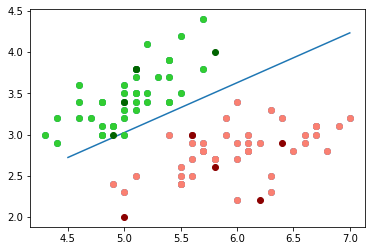

In [17]:
plt.scatter(X_train[:,1],X_train[:,2])
x=[4.5,7]
y=-(theta[1][0][0]*x/theta[2][0][0])
plt.plot([4.5,7],y.tolist()[0])   
set1=[]
set2=[]
j=0
for i in y_train:
  if i==0:
    plt.plot(X_train[j][1],X_train[j][2],marker='o',color='limegreen')
    j=j+1
  else:
    plt.plot(X_train[j][1],X_train[j][2],marker='o',color='salmon')
    j=j+1
j=0
for i in y_test:
  if i==0:
    plt.plot(X_test[j][1],X_test[j][2],color='darkgreen',marker='o')
    j=j+1
  else:
    plt.plot(X_test[j][1],X_test[j][2],marker='o',color='darkred')
    j=j+1

**(6) Consider the bank note dataset provided. Perform random shuffle and train-test split(80:20). Using sklearn, implement logistic regression to predict whether the test datapoints belong to class 0 or 1. Report the prediction accuracy on test data.**

In [34]:
from sklearn.linear_model import LogisticRegression
data=pd.read_csv('data_banknote_authentication.csv',header=None)
X=data.drop([4],axis=1).to_numpy()
y=data[4]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

## Prediction accuracy on test data is 0.992727

In [36]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
accuracy_score(y_test,y_pred)

0.9927272727272727